# Analysis Of The Air Quality In The Six Cities
* This is a detailed analysis of the air quality of the six cities.
* Here, we will make use of descriptive statistics, exploratory statistics, graphs and, charts to try and explain the trends of air quality over a six month time period.

In [136]:
# importing the needed packages.
# type: ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# reading the csv files of the six cities
daven = pd.read_csv('Daven_data.csv')
hope = pd.read_csv('Hope_air_quality_data.csv')
nicosia = pd.read_csv('Nicosia_data.csv')
Tuen = pd.read_csv('Tuen_Mun_data.csv')
vancouver = pd.read_csv('Vancouver_data.csv')
nairobi = pd.read_csv('Nairobi_data.csv')

## Data cleaning
This process will involve:
* setting datetimeUtc as index across all cities' data.
* Filling the null and empty values.

In [138]:
# dropping unnessesary columns
    # for daven data
daven = daven[['datetimeUtc', 'AQI_pm25', 'AQI_o3', 'AQI_co', 'AQI_no2', 'AQI']]
daven['datetimeUtc'] = pd.to_datetime(daven['datetimeUtc'])
# setting datetimeUtc as index
daven.set_index('datetimeUtc', inplace=True)

    # for hope data
hope = hope[['datetimeUtc', 'AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co', 'AQI']]
hope['datetimeUtc'] = pd.to_datetime(hope['datetimeUtc'])
hope.set_index('datetimeUtc', inplace=True)

    # for nicosia data
nicosia = nicosia[['datetimeUtc', 'AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co', 'AQI']]
nicosia['datetimeUtc'] = pd.to_datetime(nicosia['datetimeUtc'])
nicosia.set_index('datetimeUtc', inplace=True)

    # for Tuen data
Tuen = Tuen[['datetimeUtc', 'AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co', 'AQI']]
Tuen['datetimeUtc'] = pd.to_datetime(Tuen['datetimeUtc'])
Tuen.set_index('datetimeUtc', inplace=True)

    # for vancouver data
vancouver = vancouver[['datetimeUtc', 'AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co', 'AQI']]
vancouver['datetimeUtc'] = pd.to_datetime(vancouver['datetimeUtc'])
vancouver.set_index('datetimeUtc', inplace=True)

nairobi = nairobi[['datetimeUtc','AQI_pm25', 'AQI']]
nairobi['datetimeUtc'] = pd.to_datetime(nairobi['datetimeUtc'])
nairobi.set_index('datetimeUtc', inplace=True)

# filling the missing values for each city
    # filling the missing values for no2 in nicosia
nicosia = nicosia.fillna(value=nicosia['AQI_co'].mean())

    # filling the missing values of pm25 in Tuen
Tuen = Tuen.fillna(value=Tuen['AQI_pm25'].mean())

    # filling the missing values of pm10 in vancouver
vancouver = vancouver.fillna(value=vancouver['AQI_pm10'].mean())

# combining the data 
combined_data = pd.concat([nicosia, vancouver, Tuen, hope, daven, nairobi], keys=['nicosia', 'vancouver', 'Tuen', 'hope', 'daven', 'nairobi'])
combined_data = combined_data.assign(CityName=combined_data.index.get_level_values(0))
combined_data


AQI_pm25  AQI_pm10     AQI_o3  \
        datetimeUtc                                                  
nicosia 2024-01-01 01:00:00+00:00    3.690476  2.164502  22.084739   
        2024-01-01 02:00:00+00:00    8.571429  4.019790   3.674541   
        2024-01-01 03:00:00+00:00    5.833333  3.092146  18.410199   
        2024-01-01 04:00:00+00:00    5.714286  2.164502   7.367829   
        2024-01-01 05:00:00+00:00    5.595238  2.782931   7.367829   
...                                       ...       ...        ...   
nairobi 2024-06-30 20:00:00         56.322808       NaN        NaN   
        2024-06-30 21:00:00        172.473402       NaN        NaN   
        2024-06-30 22:00:00         52.479484       NaN        NaN   
        2024-06-30 23:00:00        187.429680       NaN        NaN   
        2024-07-01 00:00:00        236.511734       NaN        NaN   

                                       AQI_co         AQI  AQI_no2 CityName  
        datetimeUtc                                                          
nicosia 2024-01-01 01:00:00+00:00  270.046154  270.046154      NaN  nicosia  
        2024-01-01 02:00:00+00:00  137.688126    8.571429      NaN  nicosia  
        2024-01-01 03:00:00+00:00  173.866667  173.866667      NaN  nicosia  
        2024-01-01 04:00:00+00:00  217.500000  217.500000      NaN  nicosia  
        2024-01-01 05:00:00+00:00  192.838461  192.838461      NaN  nicosia  
...                                       ...         ...      ...      ...  
nairobi 2024-06-30 20:00:00               NaN   56.322808      NaN  nairobi  
        2024-06-30 21:00:00               NaN  172.473402      NaN  nairobi  
        2024-06-30 22:00:00               NaN   52.479484      NaN  nairobi  
        2024-06-30 23:00:00               NaN  187.429680      NaN  nairobi  
        2024-07-01 00:00:00               NaN  236.511734      NaN  nairobi  

[23547 rows x 7 columns]

## Exploratory Data Analysis
Here, we will perform the following operations:
* calculate basic statistics (mean, median, standard deviation) for each city's pollutant
* Visualize the distribution of AQI across the cities using histograms and boxplot
* Identify Trends or patterns over time.

In [139]:
# creating an empty dataframe
stats_data = pd.DataFrame()

# looping through each city, computing the statistics
for city, data in combined_data.groupby(level=0):
    city_stats = data.describe().transpose()# making the statistics a row
    city_stats['city'] = city # adding a cityname column
    stats_data = pd.concat([stats_data, city_stats], axis=0)

stats_data

,count,mean,std,min,25%,50%,75%,max,city
AQI_pm25,4369.0,131.915018,73.300241,0.008109,75.851479,131.915018,176.450122,299.956790,Tuen
AQI_pm10,4369.0,67.584360,38.318451,0.063173,34.366207,67.669042,101.406564,133.286303,Tuen
AQI_o3,4369.0,0.188433,0.109165,0.000011,0.094113,0.188161,0.283963,0.374952,Tuen
AQI_co,4369.0,2.716000,1.559878,0.000374,1.375048,2.716964,4.078232,5.420101,Tuen
AQI,4369.0,131.518765,70.671112,1.286672,80.980947,120.027759,176.450122,299.956790,Tuen
AQI_no2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuen
AQI_pm25,4350.0,7.801570,4.947954,0.357143,4.404762,6.428571,9.761905,57.899761,daven
AQI_pm10,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,daven
AQI_o3,4350.0,119.013321,51.696092,0.000000,84.959850,118.423856,151.882221,375.419730,daven
AQI_co,4350.0,71.900678,31.542606,0.000000,41.417209,83.165557,83.165557,459.624855,daven


## Comparing the level of AQI Among The Cities
* To compare the level of Aqi among the cities, we will use a line plot.
* Since the data is recorded hourly, we will also resample the data to daily average, and a monthly average for a clearer view.
* Computing the average AQI and comparing the average AQI across all cities using a bargraph

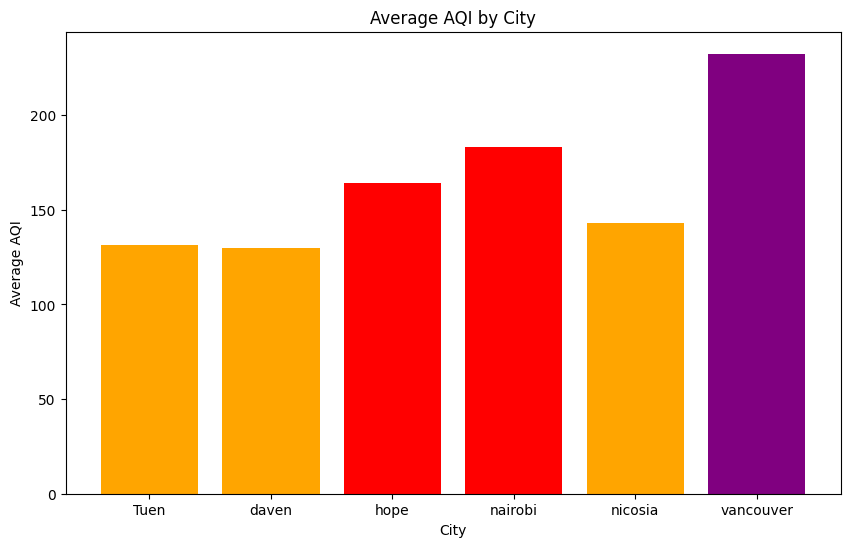

,city,AQI,Aqi_category
0,Tuen,131.518765,Unhealthy for sensitive groups
1,daven,130.055204,Unhealthy for sensitive groups
2,hope,164.037056,unhealthy
3,nairobi,183.126195,unhealthy
4,nicosia,142.871065,Unhealthy for sensitive groups
5,vancouver,232.483341,very unhealthy


In [140]:
# calculating the mean AQI for each city for 6 months, creating a dataframe
from cProfile import label


mean_aqi = combined_data.groupby(level=0)['AQI'].mean()
mean_cities = pd.DataFrame(mean_aqi).reset_index()

# renaming column index to city
mean_cities.rename(columns={'index':'city'}, inplace=True)
mean_cities['Aqi_category'] = ['Unhealthy for sensitive groups', 'Unhealthy for sensitive groups', 'unhealthy', 'unhealthy', 'Unhealthy for sensitive groups', 'very unhealthy']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mean_cities['city'], mean_cities['AQI'], color=['orange', 'orange', 'red', 'red', 'orange', 'purple'])
# Adding title and labels
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')

# Display the plot
plt.show()
mean_cities

* From the above observation, we can conclude that Vancouver city in Canada had a higher average AQI level in 6 months. 

* Hope, also in Canada, comes in closely after Vancouver followed by Nicosia, Tuen Mun and Daven.

* The average Air Quality of Tuen Mun is almost the same as that of Daven.


## Comparing the level of Pollutants across the seven cities
* Here we will compare the total average AQI for pm25, pm10, no2, o3 and co across the six cities using a bargraph.

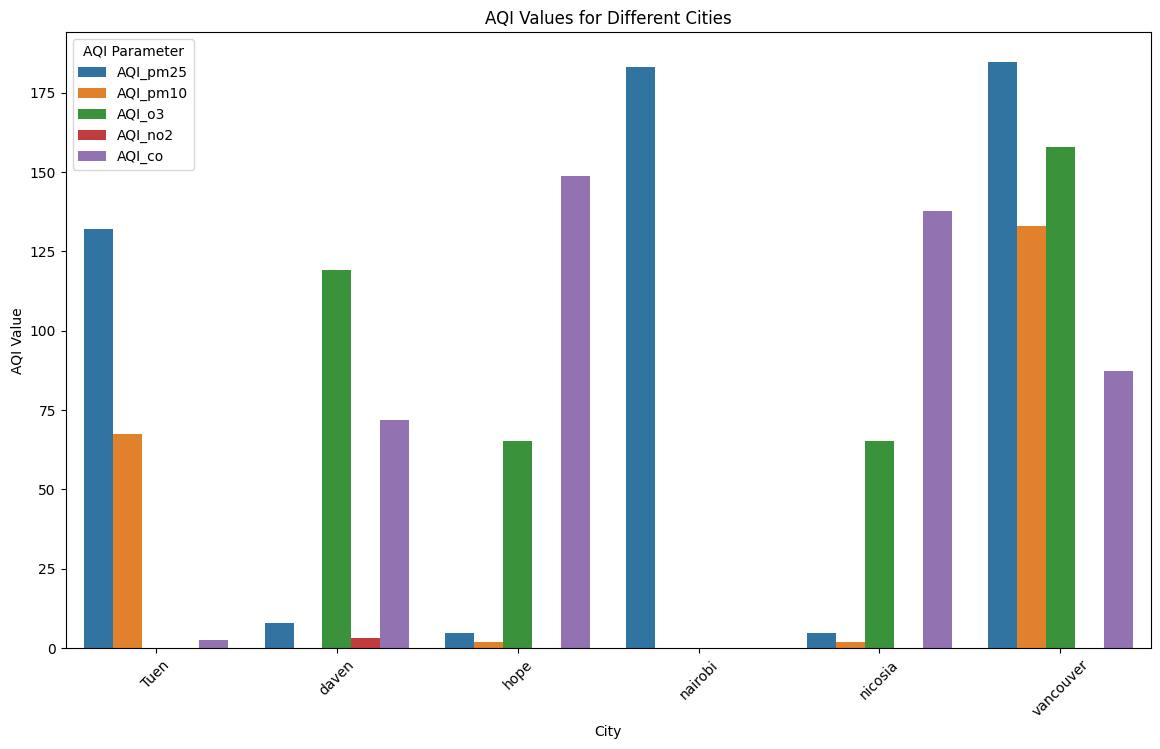

,city,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_co
0,Tuen,131.915018,67.584360,0.188433,NaN,2.716000
1,daven,7.801570,NaN,119.013321,3.11527,71.900678
2,hope,4.761777,1.822792,65.360139,NaN,148.734583
3,nairobi,183.126195,NaN,NaN,NaN,NaN
4,nicosia,4.761777,1.822792,65.360139,NaN,137.688126
5,vancouver,184.820161,133.155813,157.791776,NaN,87.468201


In [141]:
# grouping the data by the AQI for each pollutant
pollutant_aqi = combined_data.groupby(level=0)[['AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_no2', 'AQI_co']].mean()

# creating dataframe for the pollutant AQI
pollutant_aqi = pd.DataFrame(pollutant_aqi).reset_index()

# renaming column index to city
pollutant_aqi.rename(columns={'index':'city'}, inplace=True)

# Melting the DataFrame to a long format
pollutant_melted = pollutant_aqi.melt(id_vars='city', var_name='AQI_parameter', value_name='AQI_value')

# Plotting the bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='city', y='AQI_value', hue='AQI_parameter', data=pollutant_melted)
plt.title('AQI Values for Different Cities')
plt.xlabel('City')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.legend(title='AQI Parameter')
plt.show()
pollutant_aqi



* From the above graph, high levels of pm25 were recorded in Vancouver, Nairobi and Tuen Mun respectively. This may be as a result of increased vehicle emissions, increased industrial processes, construction activities and natural events like wildfires.

* High levels of pm10 in Vancouver, and Tuen Mun are as a result of various sources,including pollen, sea spray, wind-blown dust, agricultural activities, roadways, and mining operations.

* High levels of ozone also recorded in Vancouver and Daven are as a result of vehicle emissions and chemical reactions involving nitrogen oxides (NOx) and volatile organic compounds (VOCs) in sunlight.

* Nitrogen oxide was only recorded in Daven at very low quantities.

* Carbon Monoxide was recorded in high quantities in Hope and Nicosia as a result of incomplete combustion from carbon-containing fuels such as vehicles exhaust and wood stoves.

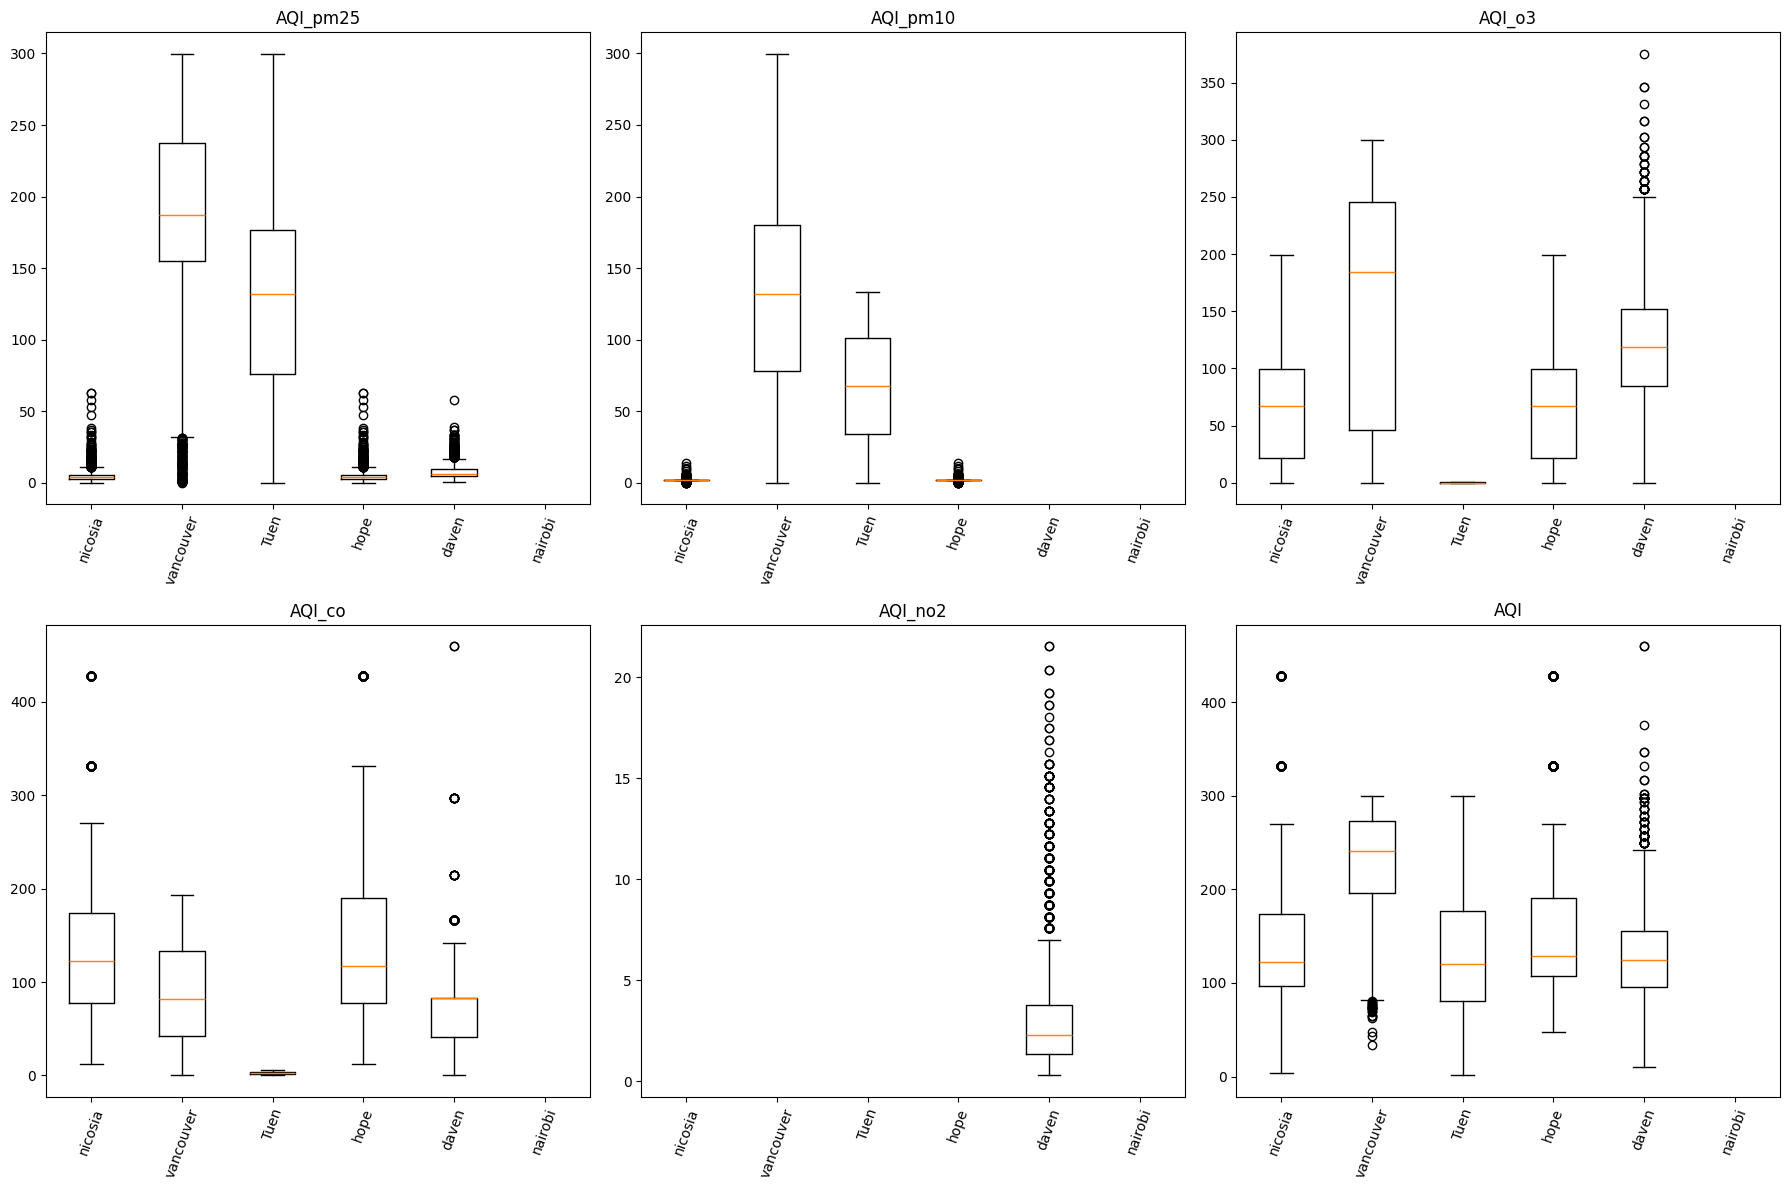

In [142]:
# Create subplots with 1 row and 3 columns, and set the figure size
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
# List of city names
city_name = ['nicosia', 'vancouver', 'Tuen', 'hope', 'daven', 'nairobi']

# List of parameters to plot
params = ['AQI_pm25','AQI_pm10','AQI_o3','AQI_co','AQI_no2', 'AQI']

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Iterate over each parameter
for i, param in enumerate(params):
    # Extract parameter data for each city
    data = [combined_data[combined_data['CityName'] == city][param].values for city in city_name]
    
    # Plot boxplots for the parameter data
    ax[i].boxplot(data)
    
    # Set x-axis labels with city names and rotate them for better readability
    ax[i].set_xticklabels(city_name, rotation=70)
    
    # Set title for the subplot
    ax[i].set_title(param)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plots
plt.show()

### Nicosia
* PM2.5: Very low levels with minimal variation, indicating excellent air quality regarding fine particulate matter.
* PM10: Similarly low to PM2.5, showing good air quality.
* CO: Low levels, with very few outliers, suggesting effective management of carbon monoxide emissions.
* NO2: Extremely low levels, indicating minimal nitrogen dioxide pollution, which is typically associated with vehicle emissions.
* O3: Some variability in ozone levels but generally within a safe range.
* Overall AQI: Reflects the low individual pollutant levels, indicating generally good air quality.

### Vancouver
* PM2.5: Moderate levels with some higher outliers, suggesting occasional poor air quality days.
* PM10: Similar to PM2.5 with moderate levels but fewer outliers, indicating slightly better conditions for coarser particles.
* CO: Consistently low levels, indicating good control of carbon monoxide.
* NO2: Very low levels with minimal fluctuations, good air quality concerning NO2.
* O3: Higher variability and more outliers than other pollutants, suggesting that ozone levels might occasionally reach unhealthy levels, possibly due to sunlight-driven reactions on warm, sunny days.
* Overall AQI: Generally moderate, aligning with the individual pollutant levels.

### Tuen Mun
* PM2.5: Low to moderate levels but with outliers indicating occasional spikes in fine particulate matter.
* PM10: Shows a pattern similar to PM2.5 with some high outliers.
* CO: Low overall levels with occasional spikes.
* NO2: Higher levels compared to other cities, suggesting significant nitrogen dioxide pollution possibly due to traffic or industrial activities.
* O3: Moderate levels with some variability.
* Overall AQI: More variable, reflecting the higher NO2 levels and occasional spikes in particulate matter.

### Hope
* PM2.5: Low levels indicating good air quality.
* PM10: Very low levels, similar to PM2.5.
* CO: Some variability with occasional higher readings, but generally low.
* NO2: Low levels indicating good control of nitrogen dioxide emissions.
* O3: Minimal data shown, suggesting low levels.
* Overall AQI: Generally low, consistent with individual pollutants.

### Davenport
* PM2.5: Consistently low levels, indicating good air quality regarding fine particulate matter.
* PM10: Similar to PM2.5, showing good air quality for coarser particles.
* CO: Very low levels, possibly the best among the cities.
* NO2: Minimal NO2 pollution.
* O3: Some variability but generally within safe limits.
* Overall AQI: Reflects the low levels of pollutants, indicating very good overall air quality.

### Nairobi
* PM2.5: High levels with significant outliers, indicating frequent poor air quality days.
* Overall AQI:moderate

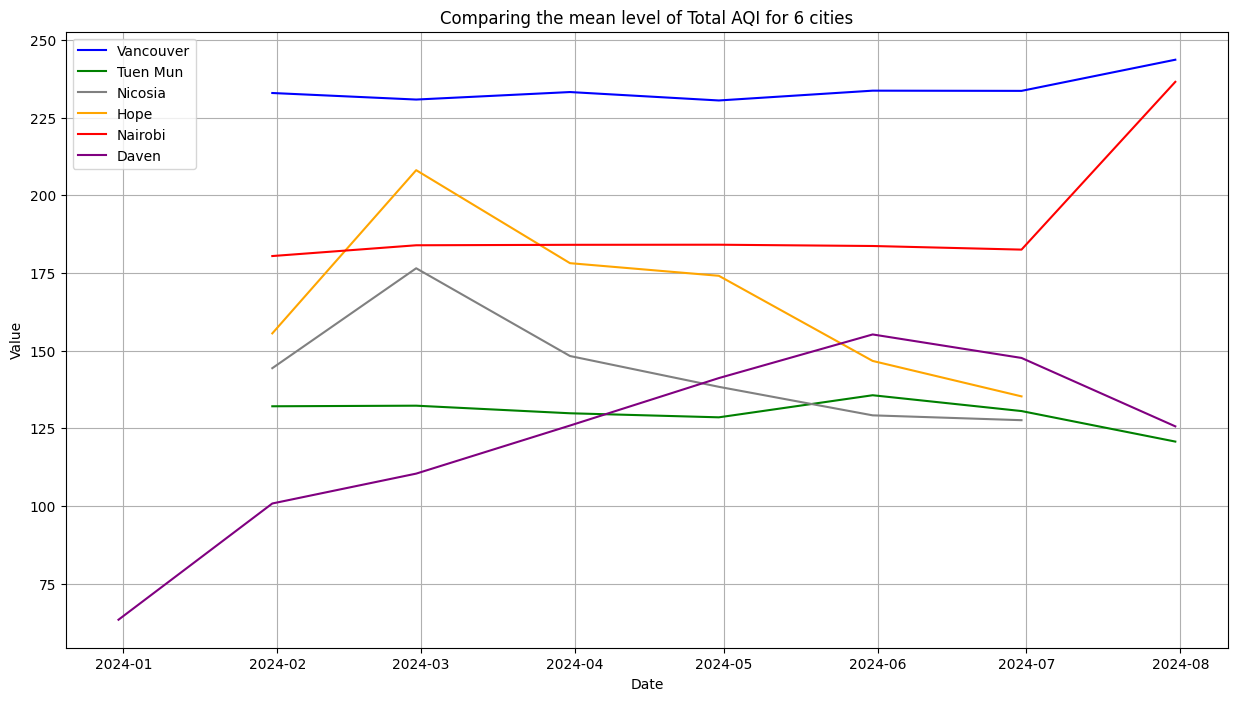

In [152]:
# resample to monthly frequency using the mean as an aggredation
vancouver_resampled = vancouver.resample('ME').mean(numeric_only=True)
Tuen_resampled = Tuen.resample('ME').mean(numeric_only=True)
nicosia_resampled = nicosia.resample('ME').mean(numeric_only=True)
hope_resampled = hope.resample('ME').mean(numeric_only=True)
nairobi_resampled = nairobi.resample('ME').mean(numeric_only=True)
daven_resampled = daven.resample('ME').mean(numeric_only=True)

# setting the figure size
plt.figure(figsize=(15,8))
sns.lineplot(data = vancouver_resampled, x='datetimeUtc', y='AQI', label='Vancouver', color='blue')
sns.lineplot(data = Tuen_resampled, x='datetimeUtc', y='AQI', label='Tuen Mun', color='green')
sns.lineplot(data = nicosia_resampled, x='datetimeUtc', y='AQI', label='Nicosia', color='grey')
sns.lineplot(data = hope_resampled, x='datetimeUtc', y='AQI', label='Hope', color='orange')
sns.lineplot(data = nairobi_resampled, x='datetimeUtc', y='AQI', label='Nairobi', color='red')
sns.lineplot(data = daven_resampled, x='datetimeUtc', y='AQI', label='Daven', color='purple')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing the mean level of Total AQI for 6 cities')
plt.grid(True)
plt.legend()
plt.show()

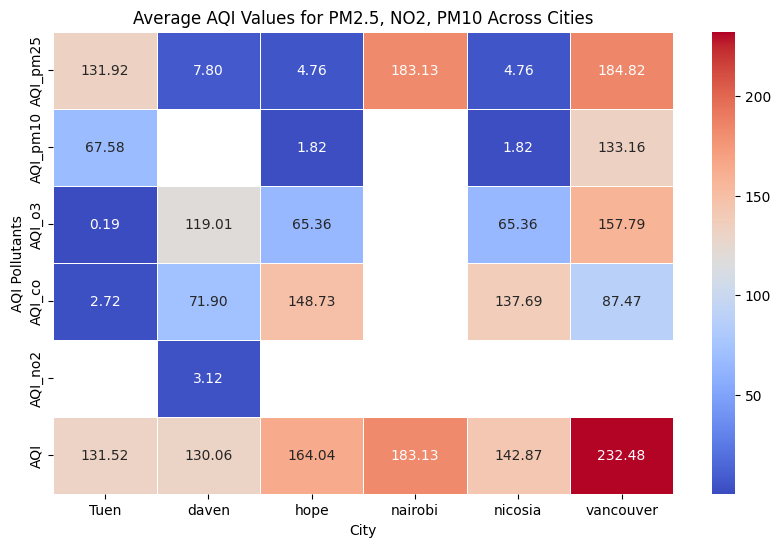

In [155]:
# Grouping the DataFrame by 'City' and calculating the mean for AQI_PM25, AQI_NO2, and AQI_PM10
avg_aqi = combined_data.groupby('CityName').mean()[['AQI_pm25','AQI_pm10','AQI_o3','AQI_co','AQI_no2', 'AQI']]

# Transposing the DataFrame to have cities as rows and AQI_pollutants as columns
avg_aqi = avg_aqi.T

# Creating a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Creating a heatmap using seaborn's heatmap function
sns.heatmap(avg_aqi, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Adding a title to the plot
plt.title('Average AQI Values for AQI_pm25, AQI_pm10, AQI_o3, AQI_co, AQI_no2, and AQI Across Cities')

# Adding a label to the x-axis
plt.xlabel('City')

# Adding a label to the y-axis
plt.ylabel('AQI Pollutants')

# Displaying the plot
plt.show()